### UMAP

A critical difference between t-SNE and UMAP is that t-SNE minimize the KL-divergence whereas UMAP minimizes the Cross-entropy, this has very different effect in global structure preservation.

* [Documentation](https://umap-learn.readthedocs.io/en/latest/)
* Reference paper: [UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction](https://arxiv.org/abs/1802.03426) (McInnes, L, Healy, J)

#### Importing Packages

In [77]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn import metrics
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# conda install -c conda-forge umap-learn
%pip install umap-learn
import umap

import seaborn as sns
sns.set(style='white', context='notebook', rc={'figure.figsize':(16,10)})

#### Loading **MNIST** Dataset

In [2]:
mnist = fetch_openml('mnist_784')
color = mnist.target.astype(int)

#### Compute the 2D embedding with **UMAP**

In [3]:
%%time

reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(mnist.data)

CPU times: user 2min 43s, sys: 2.94 s, total: 2min 45s
Wall time: 1min 48s


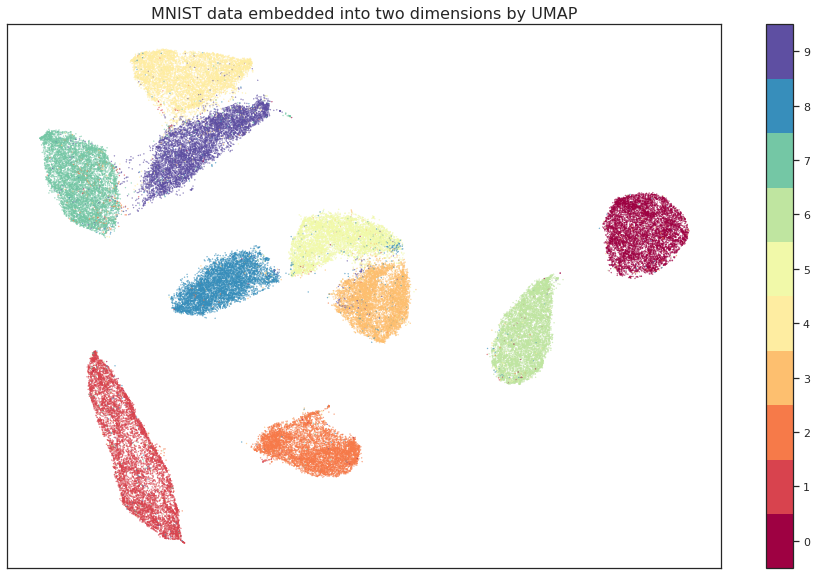

In [25]:
fig, ax = plt.subplots()
plt.scatter(embedding[:, 0], embedding[:, 1], c=color, cmap="Spectral", s=.1)
plt.setp(ax, xticks=[], yticks=[])
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title("MNIST data embedded into two dimensions by UMAP", fontsize=16)

plt.show()

#### Compute the 3D embedding with **UMAP**

In [10]:
%%time

reducer_3d = umap.UMAP(random_state=42, n_components=3)
embedding_3d = reducer_3d.fit_transform(mnist.data)

CPU times: user 2min 25s, sys: 2.5 s, total: 2min 28s
Wall time: 1min 38s


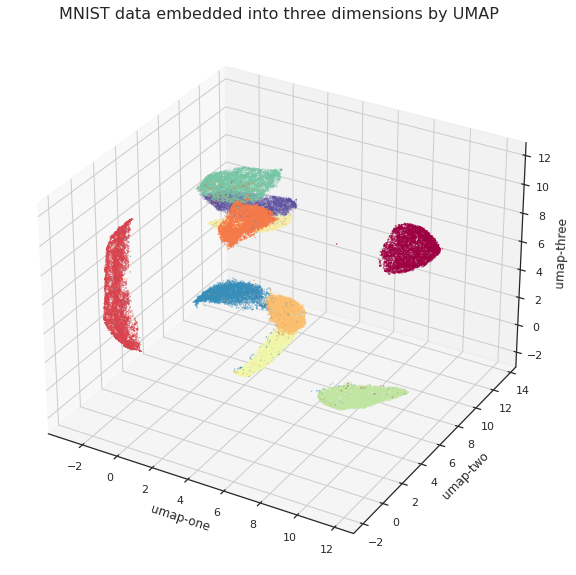

In [26]:
ax = plt.figure().gca(projection='3d')
ax.scatter(
    xs=embedding_3d[:,0],
    ys=embedding_3d[:,1],
    zs=embedding_3d[:,2],
    c=color, 
    cmap='Spectral',
    s=.1)
ax.set_xlabel('umap-one')
ax.set_ylabel('umap-two')
ax.set_zlabel('umap-three')

plt.title("MNIST data embedded into three dimensions by UMAP", fontsize=16)
plt.show()

### Clustering in the embedded space

In [70]:
def cluster_mnist(data):
    kmeans = KMeans(n_clusters=np.unique(mnist.target).size).fit(data)
    labels_preds = kmeans.predict(data)
    homogeneity = metrics.homogeneity_score(mnist.target, labels_preds)
    completeness = metrics.completeness_score(mnist.target, labels_preds)
    v_score = metrics.v_measure_score(mnist.target, labels_preds)
    print(f"homogeneity | completness | v_score")
    print(f"{homogeneity:>11.3f} | {completeness:>11.3f} | {v_score:>7.3f}")

In [74]:
cluster_mnist(mnist.data)

homogeneity | completness | v_score
      0.496 |       0.504 |   0.500


In [75]:
cluster_mnist(embedding)

homogeneity | completness | v_score
      0.849 |       0.867 |   0.857


In [76]:
cluster_mnist(embedding_3d)

homogeneity | completness | v_score
      0.837 |       0.856 |   0.846


### Clustering results
As expected, clustering in a smaller embedded space gives much better results in cluster homogeneity and completness.
However, we can see already that more dimensions is not necesserly a guarantee in clustering quality when using a non-linear embedding process such as UMAP (KMeans use Euclidean distance metric)